In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Input , Flatten
from tensorflow.keras.activations import linear, relu, sigmoid

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train) , (x_test ,y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


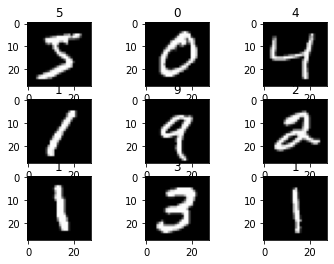

In [3]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i] , cmap = "gray")
    plt.title(y_train[i])
plt.show()

In [4]:
x_train = tf.keras.utils.normalize(x_train , axis = 1)
x_test = tf.keras.utils.normalize(x_test , axis = 1)
X_train=x_train.reshape(60000,-1)


In [5]:
tf.random.set_seed(1234)
model = Sequential([
    tf.keras.Input(shape = (784,)),
    Dense(64 , activation = 'relu' , name = "layer1"),
    Dense(64 , activation = 'relu' , name = "layer2"),
    Dense(10 , activation = 'linear' , name = "layer3")
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 64)                50240     
                                                                 
 layer2 (Dense)              (None, 64)                4160      
                                                                 
 layer3 (Dense)              (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

model.fit(
 X_train , y_train , epochs = 10
)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3180 - accuracy: 0.9096
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1324 - accuracy: 0.9600
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0954 - accuracy: 0.9704
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0741 - accuracy: 0.9770
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0602 - accuracy: 0.9808
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0493 - accuracy: 0.9840
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0413 - accuracy: 0.9866
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0347 - accuracy: 0.9890
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0288 - accuracy: 0.9906
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.026

In [8]:
X_test = x_test.reshape(10000,-1)

1/1 [==============================] - 0s 25ms/step


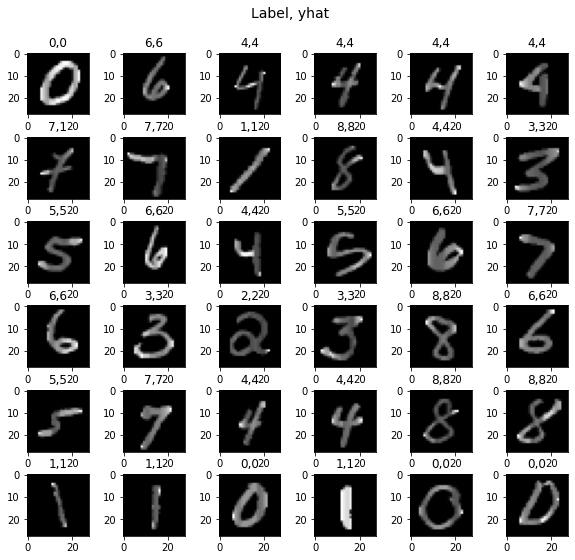

In [9]:
fig, axes = plt.subplots(6,6, figsize=(8,8))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(X_test.shape[0])
    ax.imshow(X_test[random_index].reshape((28,28)) , cmap = "gray")
    pred = model.predict(X_test[random_index].reshape((1,784)))
    pred_p = tf.nn.softmax(pred)
    yhat = np.argmax(pred_p)
    ax.set_title(f"{y_test[random_index]},{yhat}")
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [10]:
predictions = model.predict(X_test)
y_hat = np.argmax(predictions , axis = 1)

313/313 [==============================] - 0s 1ms/step


In [11]:
errors = np.where(y_hat != y_test)
acc = (1 - len(errors[0])/10000)*100
print(acc)

97.06
